In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.lines import Line2D   


In [2]:
coefficients = pd.read_csv('a_coefficient_CEcount.csv', header = 0)

In [3]:
coefficients

,a,err_a,Z,fMT,CE
0,-1.058955,0.035335,0.0002,0.1,3
1,-1.118398,0.015664,0.0004,0.1,3
2,-1.309916,0.018203,0.0008,0.1,3
3,-1.310582,0.018576,0.0012,0.1,3
4,-1.456683,0.008697,0.0016,0.1,3
...,...,...,...,...,...
247,0.053833,0.062454,0.0060,1.0,1
248,0.060040,0.064407,0.0080,1.0,1
249,-0.283532,0.058165,0.0120,1.0,1
250,-0.357296,0.079373,0.0160,1.0,1


In [4]:
#number of CE taken into account
coefficients.loc[:,'CE'].unique()

array([3, 2, 1])

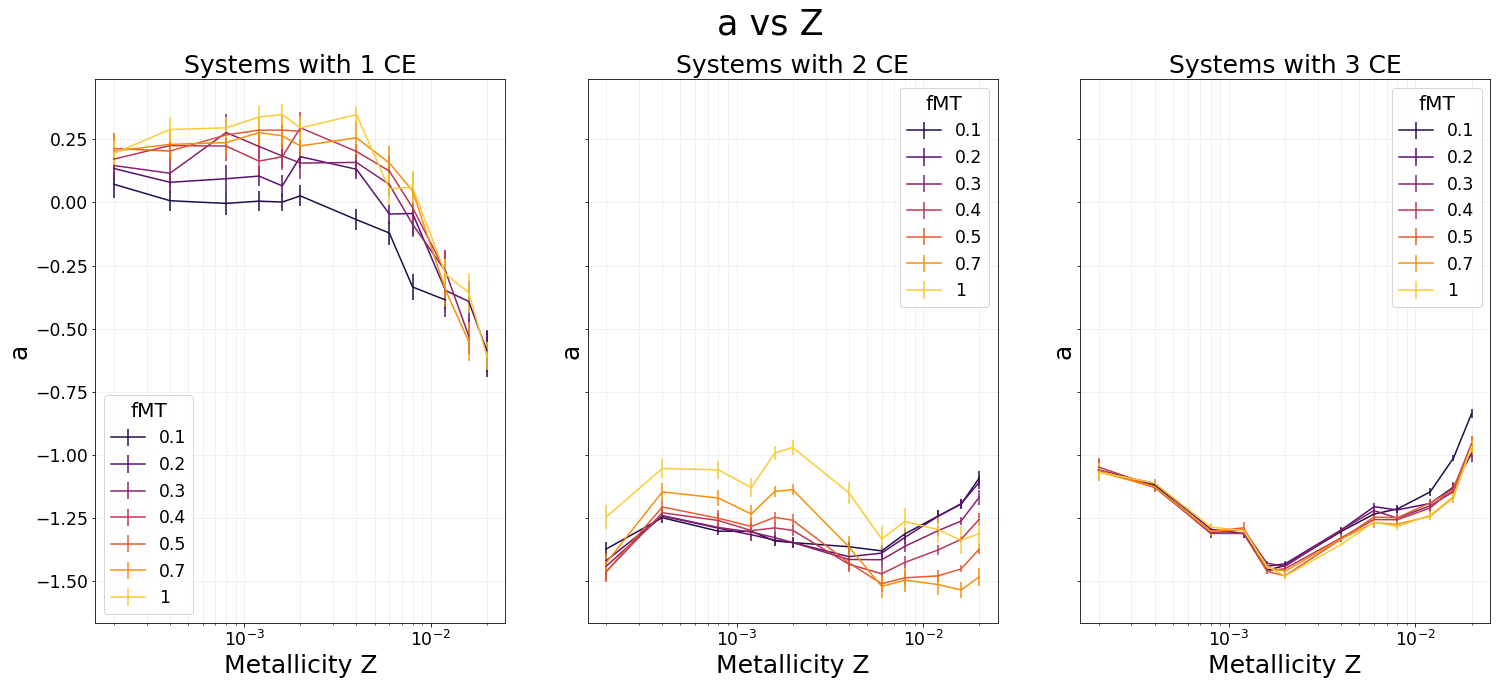

In [5]:
sns.set_palette('inferno', 7)

fMT_csv   = [0.1,0.2,0.3,0.4,0.5,0.7,1]
metallicities = [0.0002,0.0004,0.0008,0.0012,0.0016,0.002,0.004,0.006,0.008,0.012,0.016,0.02]

fig, ax = plt.subplots(1,3, figsize = (25,10), sharey = True)
for fMT in fMT_csv :
    
    data = coefficients[coefficients['fMT'] == fMT]
    
    data1 = data[data['CE'] == 1]
    data2 = data[data['CE'] == 2]
    data3 = data[data['CE'] == 3]
    
    ax[0].errorbar( x = data1['Z'], y = data1['a'], yerr = data1['err_a'], label = str(fMT) )
    ax[1].errorbar( x = data2['Z'], y = data2['a'], yerr = data2['err_a'], label = str(fMT) )
    ax[2].errorbar( x = data3['Z'], y = data3['a'], yerr = data3['err_a'], label = str(fMT) )


ax[0].tick_params( labelsize = 'xx-large' )
ax[0].set_title("Systems with 1 CE", fontsize = 25)
ax[0].set_xlabel('Metallicity Z', fontsize = 25)
ax[0].set_ylabel('a', fontsize = 25)
ax[0].set_xscale('log')
ax[0].legend(fontsize = 'xx-large', title = 'fMT', title_fontsize = 20)
ax[0].grid(True, which="both", ls="-",color='0.93')    


ax[1].tick_params( labelsize = 'xx-large' )
ax[1].set_title("Systems with 2 CE", fontsize = 25)
ax[1].set_xlabel('Metallicity Z', fontsize = 25)
ax[1].set_ylabel('a', fontsize = 25)
ax[1].set_xscale('log')
ax[1].legend(fontsize = 'xx-large', title = 'fMT', title_fontsize = 20)
ax[1].grid(True, which="both", ls="-",color='0.93')    


ax[2].tick_params( labelsize = 'xx-large' )
ax[2].set_title("Systems with 3 CE", fontsize = 25)
ax[2].set_xlabel('Metallicity Z', fontsize = 25)
ax[2].set_ylabel('a', fontsize = 25)
ax[2].set_xscale('log')
ax[2].legend(fontsize = 'xx-large', title = 'fMT', title_fontsize = 20)
ax[2].grid(True, which="both", ls="-",color='0.93')    


plt.suptitle('a vs Z', fontsize = 35)
plt.savefig('a_vs_Z_CE_count.png')
plt.show()

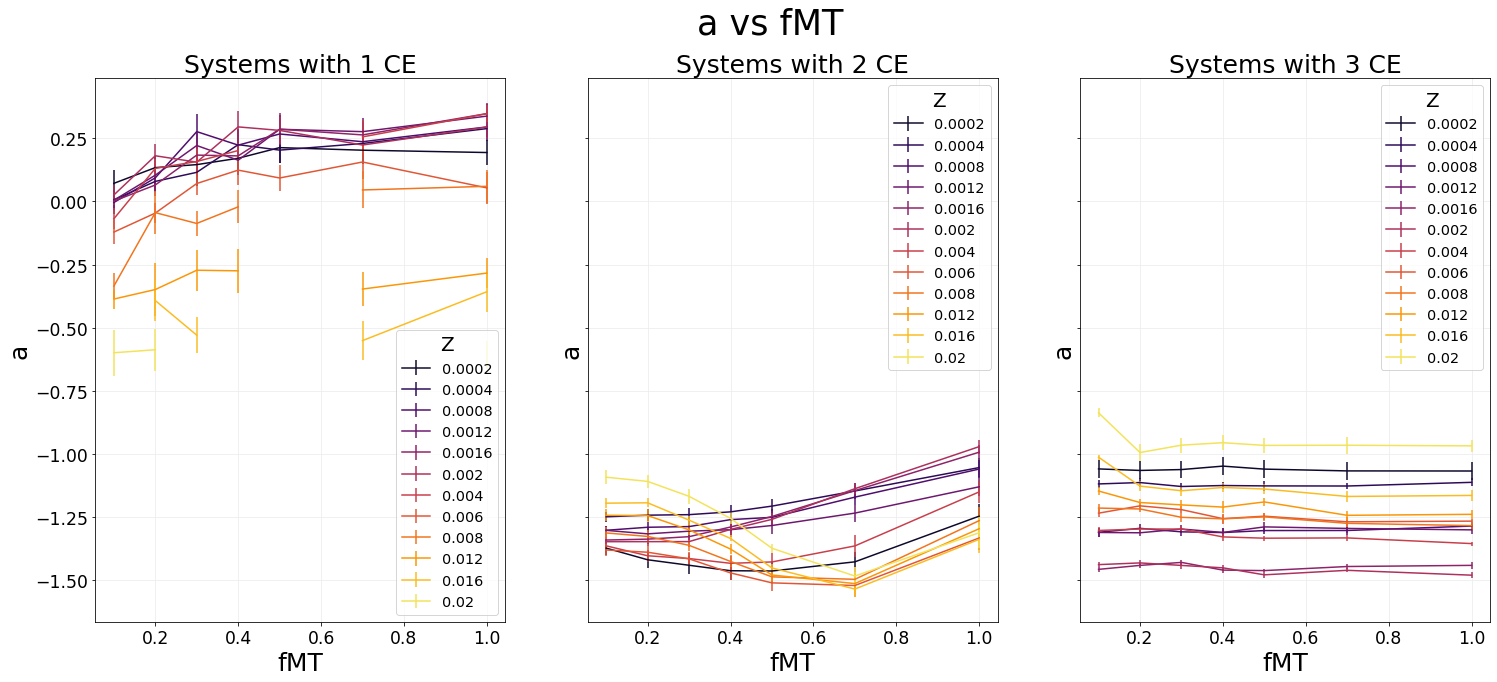

In [6]:
sns.set_palette('inferno', 12)

fig, ax = plt.subplots(1,3,figsize = (25,10), sharey = True)
for Z in metallicities :
    
    
    data = coefficients[coefficients['Z'] == Z]
    
    data1 = data[data['CE'] == 1]
    data2 = data[data['CE'] == 2]
    data3 = data[data['CE'] == 3]
    
    ax[0].errorbar( x = data1['fMT'], y = data1['a'], yerr = data1['err_a'], label = str(Z) )
    ax[1].errorbar( x = data2['fMT'], y = data2['a'], yerr = data2['err_a'], label = str(Z) )
    ax[2].errorbar( x = data3['fMT'], y = data3['a'], yerr = data3['err_a'], label = str(Z) )



ax[0].set_title("Systems with 1 CE", fontsize = 25)
ax[0].set_xlabel('fMT', fontsize = 25)
ax[0].set_ylabel('a', fontsize = 25)
ax[0].tick_params( labelsize = 'xx-large' )
ax[0].legend(fontsize = 'x-large', title = 'Z', title_fontsize = 20)
ax[0].grid(True, which="both", ls="-",color='0.93')    


ax[1].set_title("Systems with 2 CE", fontsize = 25)
ax[1].set_xlabel('fMT', fontsize = 25)
ax[1].set_ylabel('a', fontsize = 25)
ax[1].tick_params( labelsize = 'xx-large' )
ax[1].legend(fontsize = 'x-large', title = 'Z', title_fontsize = 20)
ax[1].grid(True, which="both", ls="-",color='0.93')    


ax[2].set_title("Systems with 3 CE", fontsize = 25)
ax[2].set_xlabel('fMT', fontsize = 25)
ax[2].set_ylabel('a', fontsize = 25)
ax[2].tick_params( labelsize = 'xx-large' )
ax[2].legend(fontsize = 'x-large', title = 'Z', title_fontsize = 20)
ax[2].grid(True, which="both", ls="-",color='0.93')    



plt.suptitle('a vs fMT', fontsize = 35)
plt.savefig('a_vs_fMT_CE_count.png')
plt.show()

# Mean calculations

In [7]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.
    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    
    variance = np.average((values-average)**2, weights=weights)
    
    return (average, math.sqrt(variance))

# All data together

In [8]:
number_CE = coefficients.loc[:,'CE'].unique()

for CE in number_CE:
    
    sub_data = coefficients[coefficients['CE'] == CE]
    
    a_values = np.array(sub_data.loc[:,'a'].dropna())
    weights  = np.array(sub_data.loc[:,'err_a'].dropna())
        
    print("For number of CE ", CE, " coefficient a is:", weighted_avg_and_std(a_values, weights = weights) )



For number of CE  3  coefficient a is: (-1.1879431692537339, 0.1456476873989346)
For number of CE  2  coefficient a is: (-1.3116422569805664, 0.1271689891887721)
For number of CE  1  coefficient a is: (0.012055560696960912, 0.27443419301210237)


# Non conservative case

In [9]:
data_non_conservative = coefficients[coefficients['fMT'] <= 0.5]

for CE in number_CE:
    
    sub_data = data_non_conservative[data_non_conservative['CE'] == CE]
    a_values = np.array(sub_data.loc[:,'a'].dropna())
    
    weights  = np.array(sub_data.loc[:,'err_a'].dropna())
    
    print("For number of CE ", CE, " coefficient a is:", weighted_avg_and_std(a_values, weights = weights) )
    


For number of CE  3  coefficient a is: (-1.1840763851872351, 0.14575146359799426)
For number of CE  2  coefficient a is: (-1.330373271053562, 0.09659708991890971)
For number of CE  1  coefficient a is: (-0.004327269974483689, 0.2603527182648019)
